In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/shuai/Desktop/510 project/Life Expectancy Data.csv')




In [3]:
df = df.dropna(subset=['Life expectancy '])

columns_to_fillna = [
    'Alcohol', 'Polio', 'Total expenditure', 'Hepatitis B', 'Diphtheria ',
    ' BMI ', 'GDP', 'Population', ' thinness  1-19 years',
    ' thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

# Calculate the mean values for the specified columns
mean_values = df[columns_to_fillna].mean()

# Fill NaN values with their respective mean values
df[columns_to_fillna] = df[columns_to_fillna].fillna(mean_values)

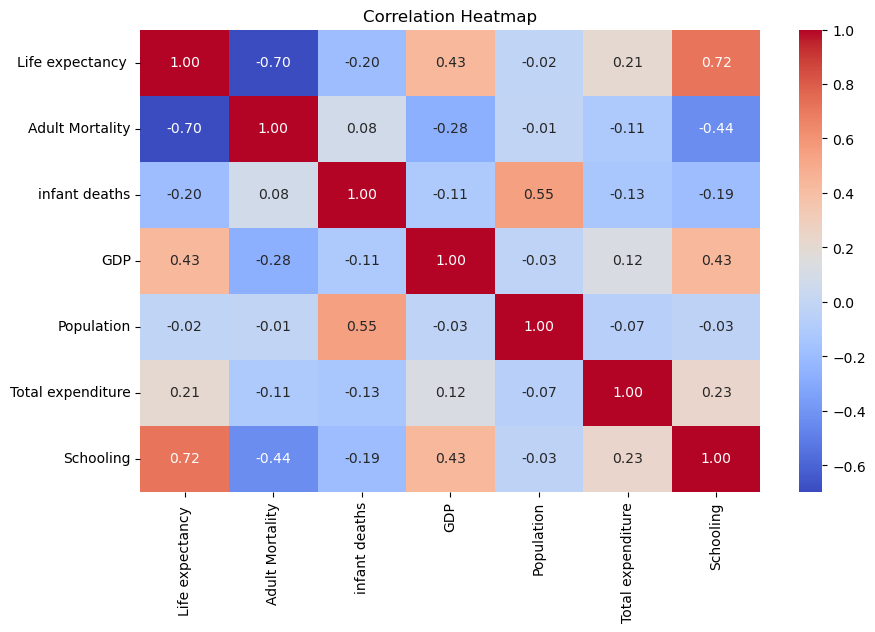

In [4]:
corr_matrix = df[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'GDP', 'Population', 'Total expenditure', 'Schooling']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

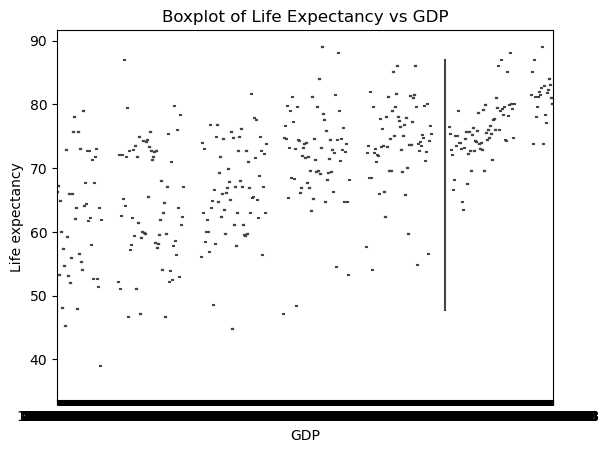

In [5]:
sns.boxplot(x='GDP', y='Life expectancy ', data=df)
plt.title("Boxplot of Life Expectancy vs GDP")
plt.show()


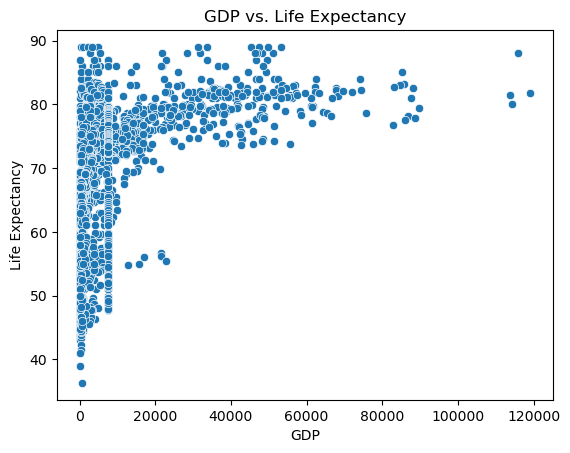

In [6]:
df.dropna(subset=['GDP'], inplace=True)
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [11]:
df = df.drop(columns=['Country', 'Status'])

df['Life expectancy '] = pd.to_numeric(df['Life expectancy '], errors='coerce')

target_correlations = df.drop('Life expectancy ', axis=1).apply(lambda x: x.corr(df['Life expectancy ']))

non_null_correlations = target_correlations.dropna()
non_zero_correlations = non_null_correlations[non_null_correlations != 0]

In [12]:
print(non_zero_correlations)

Year                               0.170033
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.392420
percentage expenditure             0.381864
Hepatitis B                        0.204566
Measles                           -0.157586
 BMI                               0.562453
under-five deaths                 -0.222529
Polio                              0.462592
Total expenditure                  0.209628
Diphtheria                         0.476442
 HIV/AIDS                         -0.556556
GDP                                0.430551
Population                        -0.019629
 thinness  1-19 years             -0.472778
 thinness 5-9 years               -0.467231
Income composition of resources    0.692621
Schooling                          0.718614
dtype: float64
